# **TITANIC SURVIVAL PREDICTION**

# **BIRTH OF DATA**

In [30]:
import pandas as pd
import numpy as np

In [31]:
df= pd.read_csv('/Users/lohit/Downloads/tested.csv')
df.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


# **PREPROCESSING**

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [37]:
Embarkeds = df.Embarked.unique()
for Embarked in Embarkeds:
    print("Embarked:", Embarked)

Embarked: Q
Embarked: S
Embarked: C


In [38]:
df['Embarked'] = df["Embarked"].map({'Q':0, 'S':1, 'C':2}).astype(int)
df["Embarked"].head(7)

0    0
1    1
2    0
3    1
4    1
5    1
6    0
Name: Embarked, dtype: int32

In [39]:
df["Sex"] = df["Sex"].map({'female':1, 'male':0}).astype(int)
df["Sex"].head(7)

0    0
1    1
2    0
3    0
4    1
5    0
6    1
Name: Sex, dtype: int32

In [40]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [41]:
df["Age"] = df.Age.astype(int)
df["Fare"] = df.Fare.astype(int)

In [42]:
df.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,NaN,1
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14,0,0,7538,9,NaN,1
6,898,1,3,"Connolly, Miss. Kate",1,30,0,0,330972,7,NaN,0
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26,1,1,248738,29,NaN,1
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18,0,0,2657,7,NaN,2


**REMOVING USELESS DATA**

In [43]:
uselessData = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace = True)
df.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
5,0,3,0,14,0,0,9,1
6,1,3,1,30,0,0,7,0


In [44]:
#_, ax = mpl.subplots(figsize = (13, 8))
#sb.histplot(data = df, x = "Sex", hue = "Survived", palette = ["red", "green"])
#mpl.plot()
df[(df["Sex"] == 1) & (df["Survived"]==1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,3,1,47,1,0,7,1
4,1,3,1,22,1,1,12,1
6,1,3,1,30,0,0,7,0
8,1,3,1,18,0,0,7,2
12,1,1,1,23,1,0,82,1
...,...,...,...,...,...,...,...,...
409,1,3,1,3,1,1,13,1
410,1,3,1,30,0,0,7,0
411,1,1,1,37,1,0,90,0
412,1,3,1,28,0,0,7,1


# **DATA VISUALIZATION**

In [45]:
import seaborn as sb
import matplotlib.pyplot as mpl

In [46]:
sb.set(style = "dark", font = "Times New Roman")

[]

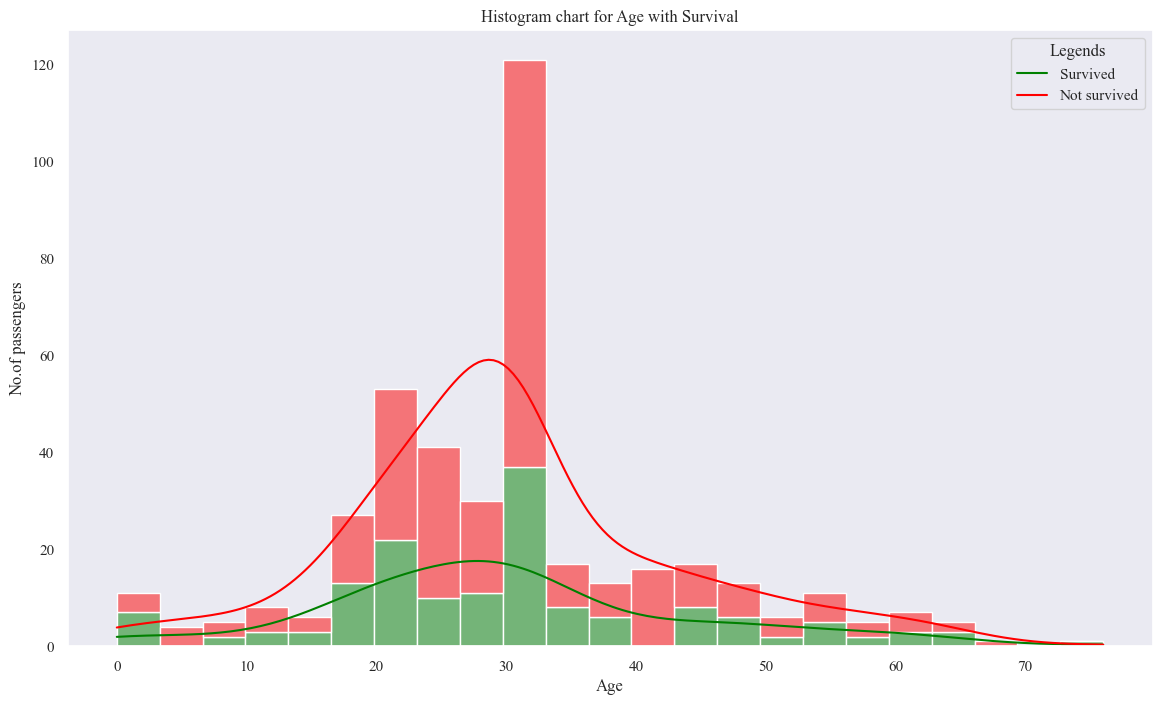

In [47]:
_, ax = mpl.subplots(figsize = (14, 8))
sb.histplot(data = df, x = "Age", hue = "Survived", multiple = "stack", kde = True, palette=["red", "green"], ax = ax)
ax.set_title("Histogram chart for Age with Survival")
ax.set_xlabel("Age")
ax.set_ylabel("No.of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
mpl.plot()

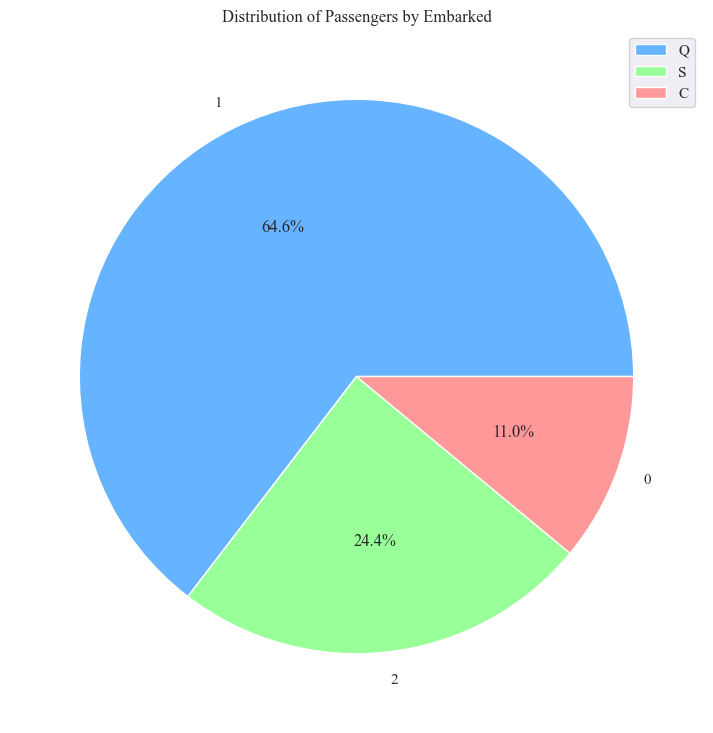

In [48]:
embarked_counts = df['Embarked'].value_counts()
mpl.figure(figsize=(9, 9))
mpl.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'])
mpl.title("Distribution of Passengers by Embarked")
mpl.legend(["Q", "S", "C"])
mpl.show()

[]

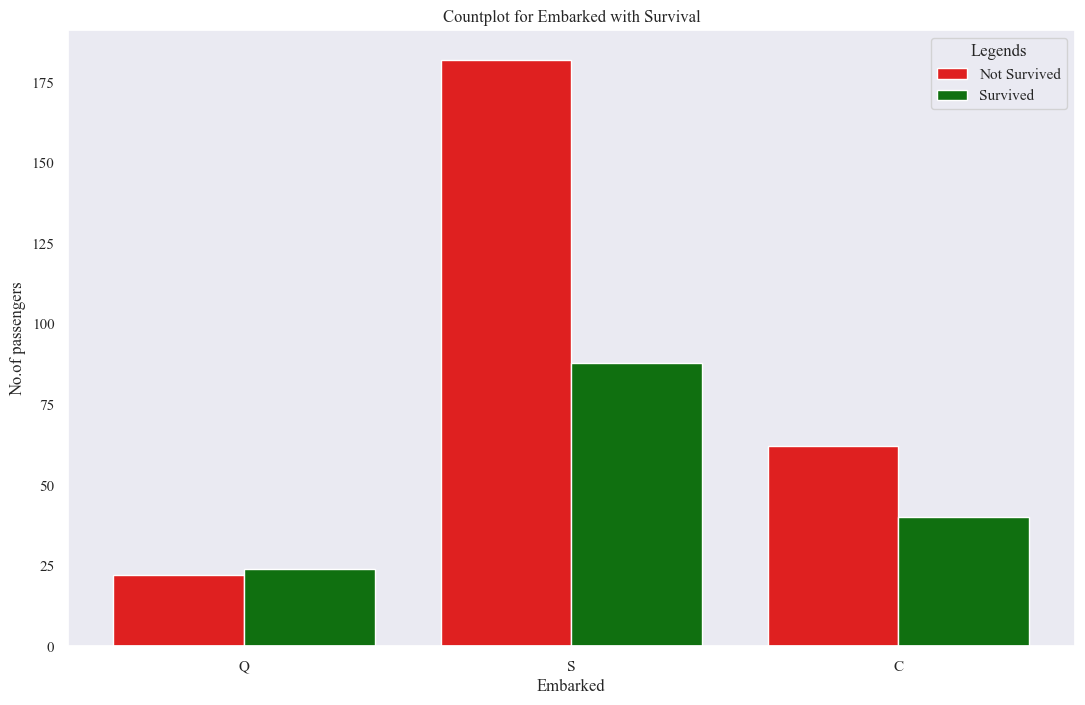

In [49]:
_, ax = mpl.subplots(figsize = (13, 8))
sb.countplot(data = df, x = "Embarked", hue = "Survived", palette=["red", "green"], ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("No.of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
mpl.plot()

[]

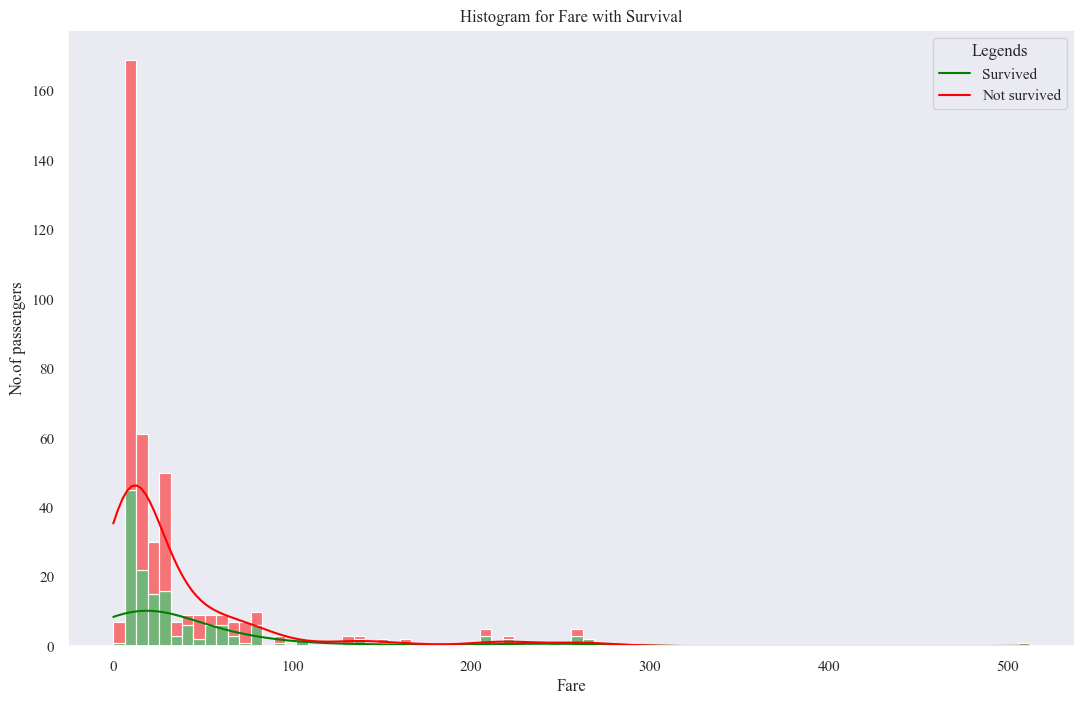

In [50]:
_, ax = mpl.subplots(figsize = (13, 8))
sb.histplot(data = df, x = "Fare", hue = "Survived", multiple = "stack", kde = True, palette = ["red", "green"], ax = ax)
ax.set_title("Histogram for Fare with Survival")
ax.set_xlabel("Fare")
ax.set_ylabel("No.of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
mpl.plot()

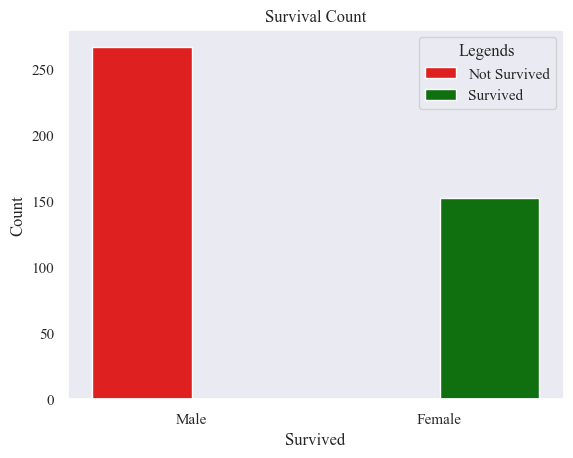

In [51]:
ax = sb.countplot(data = df, x="Survived", hue = "Survived", palette = ["red", "green"])
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("Survival Count")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
mpl.xticks([0,1],["Male", "Female"])
mpl.show()

# **SPLITTING  DATA**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
Input = df.drop(['Survived'], axis=1)
Output = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

# ** MODEL**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as score

In [55]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
PredictedValue = LR.predict(x_test)
print("Accuracy = {:0.2f}%".format(score(PredictedValue, y_test)*100))

Accuracy = 100.00%
